In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [4]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [5]:
img_width = 180
img_height = 180

In [6]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [8]:
data_cat = data_train.class_names

In [9]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [10]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_width, img_height),
    batch_size=32,
    shuffle=False,
    validation_split=False)

Found 351 files belonging to 36 classes.


In [11]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_width, img_height),
    shuffle=False,
    batch_size=32,
    validation_split=False)

Found 359 files belonging to 36 classes.


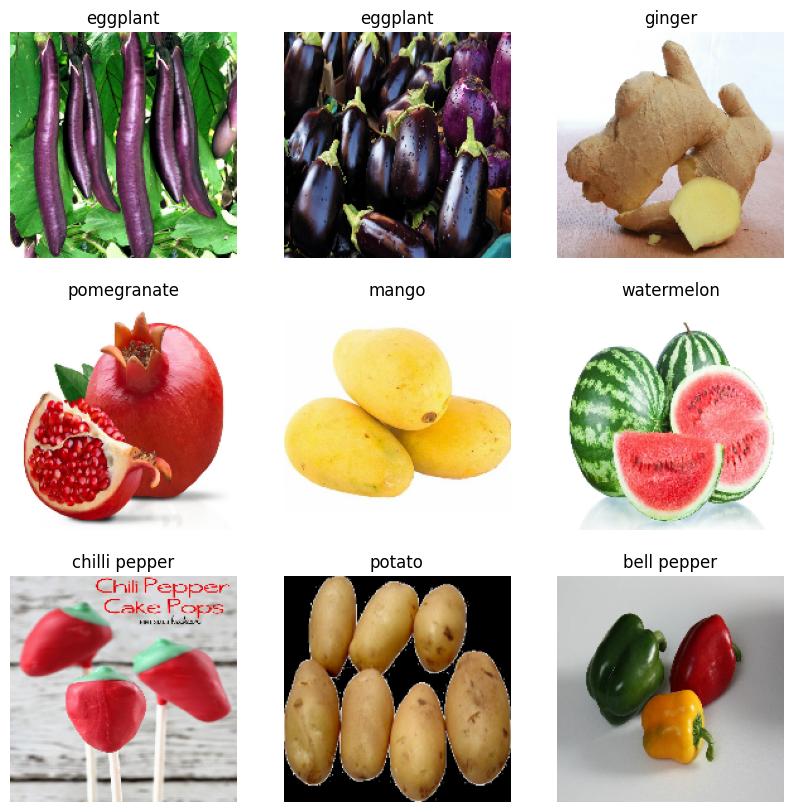

In [12]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
         plt.subplot(3,3,i+1)
         plt.imshow(image[i].numpy().astype('uint8'))
         plt.title(data_cat[labels[i]])
         plt.axis('off')      
        
    

In [13]:
from tensorflow.keras.models import Sequential

In [14]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
    
])

In [16]:
model.compile(optimizer= 'adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [17]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 32s 300ms/step - accuracy: 0.0780 - loss: 3.4980 - val_accuracy: 0.4046 - val_loss: 2.1207
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 261ms/step - accuracy: 0.3059 - loss: 2.3885 - val_accuracy: 0.5527 - val_loss: 1.5242
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 295ms/step - accuracy: 0.4659 - loss: 1.8659 - val_accuracy: 0.7265 - val_loss: 1.0286
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 295ms/step - accuracy: 0.6129 - loss: 1.3491 - val_accuracy: 0.8547 - val_loss: 0.6090
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 315ms/step - accuracy: 0.7492 - loss: 0.8029 - val_accuracy: 0.8775 - val_loss: 0.5793
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 265ms/step - accuracy: 0.8769 - loss: 0.4369 - val_accuracy: 0.9430 - val_loss: 0.3628
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 265ms/step - accuracy: 0.9182 - loss: 0.3551 - val_accuracy: 0.9345 - val_loss: 0.6506
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 280ms/step - accuracy: 0.9406 - loss: 0.2939 - val_accu

Text(0.5, 1.0, 'Loss')

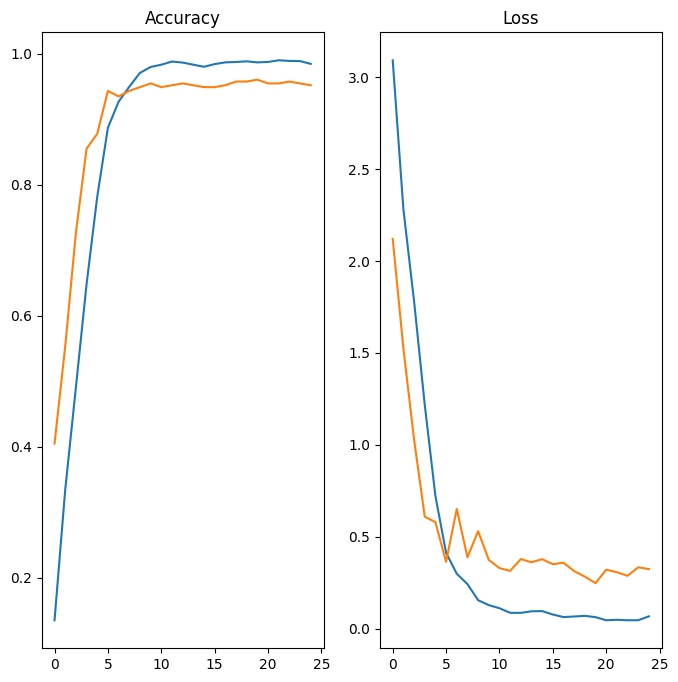

In [18]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Tranning Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label= 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Tranning Accuracy')
plt.plot(epochs_range, history.history['val_loss'],label= 'Validation Loss')
plt.title('Loss')

In [31]:
image = 'Chilli.jpeg'
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.img_to_array(image)
img_bat = tf.expand_dims(img_arr, 0)

In [32]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [33]:
score = tf.nn.softmax(predict)

In [34]:
print('veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

veg/Fruit in image is watermelon with accuracy of 60.40


In [36]:
model.save('image_classify.keras')